In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the datasets (Update the file paths accordingly)
purchase_df = pd.read_csv("purchase_behaviour.csv")
transactions_df = pd.read_csv("transaction_data.csv")

In [5]:
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Merge datasets on LYLTY_CARD_NBR
df = pd.merge(transactions_df, purchase_df, on="LYLTY_CARD_NBR", how="left")

In [8]:
# Calculate Profit (Assumption: TOT_SALES represents revenue, and cost price is estimated)
df["Profit"] = df["TOT_SALES"] * 0.3  # Assuming a 30% profit margin

In [9]:
# Identify Top 3 Most Profitable Products
top_products = df.groupby("PROD_NAME")["Profit"].sum().sort_values(ascending=False).head(3)
print("Top 3 Most Profitable Products:")
print(top_products)

Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            12105.60
Smiths Crnkle Chip  Orgnl Big Bag 380g      10910.28
Smiths Crinkle Chips Salt & Vinegar 330g    10441.26
Name: Profit, dtype: float64


In [10]:
# Identify Most Loyal Customers (Based on Frequency of Purchases)
customer_loyalty = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().sort_values(ascending=False)
loyal_customers = customer_loyalty.head(10)


In [11]:
# Analyze Customer Characteristics
customer_info = df[df["LYLTY_CARD_NBR"].isin(loyal_customers.index)][["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]]
customer_segments = customer_info.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Count")
print("\nMost Loyal Customer Segments:")
print(customer_segments.sort_values("Count", ascending=False))



Most Loyal Customer Segments:
               LIFESTAGE PREMIUM_CUSTOMER  Count
1         OLDER FAMILIES       Mainstream     35
0         OLDER FAMILIES           Budget     33
4         YOUNG FAMILIES          Premium     33
2  OLDER SINGLES/COUPLES          Premium     32
5  YOUNG SINGLES/COUPLES       Mainstream     18
3         YOUNG FAMILIES       Mainstream     17


C:\Users\vr320\AppData\Local\Temp\ipykernel_19264\3551886095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


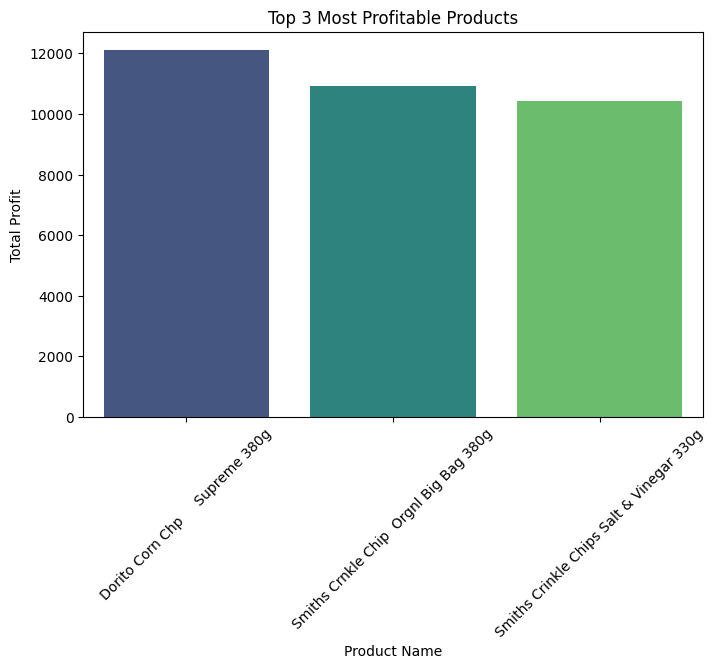

In [12]:
# Visualize Top 3 Profitable Products
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

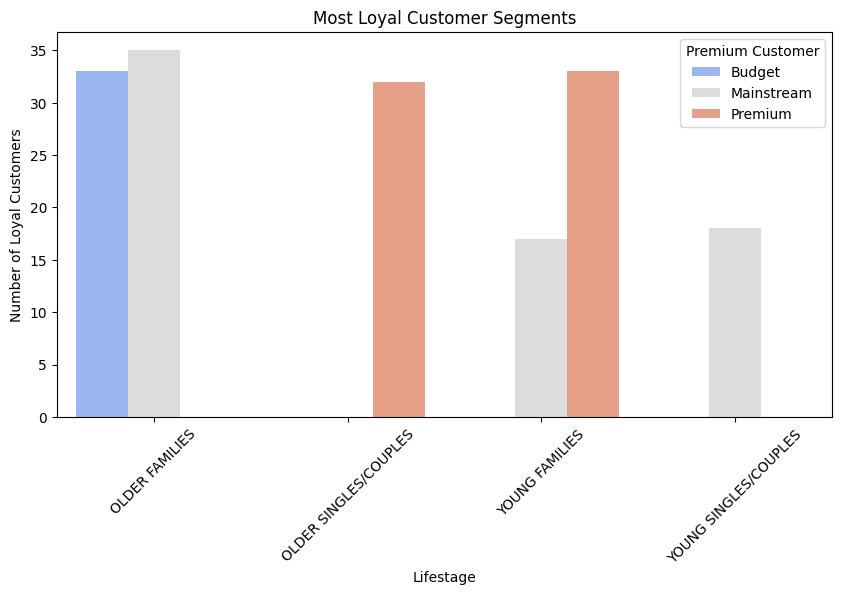

In [13]:
# Visualize Loyal Customer Segments
plt.figure(figsize=(10,5))
sns.barplot(x="LIFESTAGE", y="Count", hue="PREMIUM_CUSTOMER", data=customer_segments, palette="coolwarm")
plt.title("Most Loyal Customer Segments")
plt.xlabel("Lifestage")
plt.ylabel("Number of Loyal Customers")
plt.legend(title="Premium Customer")
plt.xticks(rotation=45)
plt.show()